## Task:

## create a small dataset of Twitter comments on “intellectual property “ or “patent lawyer “ and 

	1.	Perform exploratory data analysis (EDA) and identify key trends.
	2.	Build and evaluate a predictive model (e.g., decision tree or logistic regression).
	3.	Suggest insights and business recommendations based on the results.



## **Project: Twitter Sentiment Analysis on Intellectual Property & Patent Lawyers**

**Objective**:  
The goal of this project was to analyze Twitter comments and discussions surrounding the topics of "intellectual property" and "patent lawyers" to gain insights into public sentiment and trends. The project aimed to identify key factors influencing sentiment, create a predictive model, and provide actionable business recommendations.

**Process**:  
1. **Data Collection**:  
   I retrieved a set of tweets related to intellectual property and patent law using the Twitter API (V2). These tweets were filtered for language and relevance to the chosen topics.

2. **Data Preprocessing**:  
   The raw data was cleaned by removing unnecessary columns, handling missing values, and standardizing the text data (e.g., removing special characters and stopwords).

3. **Exploratory Data Analysis (EDA)**:  
   I performed EDA to understand the distribution of tweet sentiment, trends over time, and the frequency of specific keywords. Sentiment analysis was conducted using NLP techniques to categorize tweets into positive, negative, and neutral sentiments.

4. **Text Vectorization**:  
   Text data was transformed into a numerical format using TF-IDF Vectorization, which helped in analyzing patterns and relationships between different keywords.

5. **Predictive Modeling**:  
   I built a predictive model using Logistic Regression and Decision Tree to classify tweet sentiments based on their content. The model was evaluated using accuracy and precision metrics to ensure reliable performance.

6. **Business Insights**:  
   - **Sentiment Trends**: Identified public approval and areas of dissatisfaction in the patent law and intellectual property space.
   - **Targeted Marketing**: Provided insights on how businesses can tailor marketing campaigns based on sentiment.
   - **Reputation Management**: Offered strategies for brands to manage negative feedback proactively.

**Key Takeaways**:  
This project demonstrated the power of sentiment analysis and NLP in understanding public opinion, especially in the legal and intellectual property domains. The insights can guide businesses in refining their strategies, improving customer experience, and identifying emerging trends.

--- 

Feel free to personalize or modify the description as per your preference!

In [5]:
import requests
import time
import pandas as pd

BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAMy7xwEAAAAAaN87cFmAdjfHoVN6VY90ZTLMca0%3Dw0T42veIYJWYZHcucjhP8CJnUm6l22oGNgmvWVOe74gVmFp2kw"

# Setup headers using Bearer Token for Twitter API V2
def create_headers(bearer_token):
    headers = {
        'Authorization': f'Bearer {bearer_token}',
        'User-Agent': 'v2RecentSearchPython'
    }
    return headers

# Create the URL for the search query
def create_url(query, max_results=100):
    url = f'https://api.twitter.com/2/tweets/search/recent?query={query}&max_results={max_results}&tweet.fields=created_at,text,author_id'
    return url

# Connecting to the Twitter API endpoint and retrieve data
def connect_to_endpoint(url, headers):
    response = requests.get(url, headers=headers)
    print(f"Status code: {response.status_code}")
    
    if response.status_code == 200:
        return response.json()  # Return the JSON response if successful
    elif response.status_code == 429:
        print("Rate limit exceeded. Retrying in 15 minutes...")
        time.sleep(900)  # Wait for 15 minutes before retrying
        return connect_to_endpoint(url, headers)  # Retry after waiting
    else:
        print(f"Error: {response.status_code} - {response.text}")
        return None

# Use the Bearer Token to authenticate
headers = create_headers(BEARER_TOKEN)

# Build the search query URL
url = create_url('"intellectual property" OR "patent lawyer" lang:en')

# Fetch the tweet data
json_response = connect_to_endpoint(url, headers)

# Check if the response has data and create DataFrame
if json_response:
    tweets_data = json_response.get('data', [])
    if tweets_data:
        
        # Convert the list of tweets to a DataFrame
        data = pd.DataFrame(tweets_data)
        print(data)
    else:
        print("No tweets found.")
else:
    print("No data retrieved.")


Status code: 429
Rate limit exceeded. Retrying in 15 minutes...
Status code: 200
              author_id                created_at edit_history_tweet_ids  \
0            3275965868  2025-01-05T06:27:40.000Z  [1875791255550226640]   
1            1680329058  2025-01-05T06:27:27.000Z  [1875791202127376555]   
2   1707532822972370945  2025-01-05T06:27:22.000Z  [1875791178932859157]   
3   1707532822972370945  2025-01-05T06:27:19.000Z  [1875791167155245190]   
4            3072694257  2025-01-05T06:26:02.000Z  [1875790844521017384]   
..                  ...                       ...                    ...   
95  1265862776611917824  2025-01-05T04:37:05.000Z  [1875763426347372748]   
96  1628715045977985024  2025-01-05T04:35:57.000Z  [1875763140606226611]   
97  1870112740888719361  2025-01-05T04:35:39.000Z  [1875763066643869701]   
98  1852005461203259393  2025-01-05T04:35:37.000Z  [1875763055487021461]   
99  1872662964932874241  2025-01-05T04:34:49.000Z  [1875762854303056264]   

      

In [7]:
data

,author_id,created_at,edit_history_tweet_ids,text,id
0,3275965868,2025-01-05T06:27:40.000Z,[1875791255550226640],@Crypto_He @StoryProtocol @StoryChina_ @Benjam...,1875791255550226640
1,1680329058,2025-01-05T06:27:27.000Z,[1875791202127376555],@BenjaminOnIP @StoryProtocol @BenjaminOnIP Exc...,1875791202127376555
2,1707532822972370945,2025-01-05T06:27:22.000Z,[1875791178932859157],"7/ As the Web3 ecosystem continues to evolve, ...",1875791178932859157
3,1707532822972370945,2025-01-05T06:27:19.000Z,[1875791167155245190],4/ By leveraging Story Protocol's infrastructu...,1875791167155245190
4,3072694257,2025-01-05T06:26:02.000Z,[1875790844521017384],@hualunjiejie @BenjaminOnIP\n꧁IP꧂ @StoryProtoc...,1875790844521017384
...,...,...,...,...,...
95,1265862776611917824,2025-01-05T04:37:05.000Z,[1875763426347372748],RT @regularaugust: Some people on this site ac...,1875763426347372748
96,1628715045977985024,2025-01-05T04:35:57.000Z,[1875763140606226611],@UnleashProtocol @BenjaminOnIP Congrats on the...,1875763140606226611
97,1870112740888719361,2025-01-05T04:35:39.000Z,[1875763066643869701],The Benjamin AI project is truly an outstandin...,1875763066643869701
98,1852005461203259393,2025-01-05T04:35:37.000Z,[1875763055487021461],Tokenizing intellectual property creates innov...,1875763055487021461


In [11]:
data.shape

(100, 5)

In [15]:
data['text'].head(50)

0     @Crypto_He @StoryProtocol @StoryChina_ @Benjam...
1     @BenjaminOnIP @StoryProtocol @BenjaminOnIP Exc...
2     7/ As the Web3 ecosystem continues to evolve, ...
3     4/ By leveraging Story Protocol's infrastructu...
4     @hualunjiejie @BenjaminOnIP\n꧁IP꧂ @StoryProtoc...
5     @Crypto_He @StoryProtocol @StoryChina_ @Benjam...
6     RT @RaZaQaYyOoM: Intellectual Property Rights ...
7     @BenjaminOnIP @BenjaminOnIP @StoryProtocol Exc...
8     @BenjaminOnIP @BenjaminOnIP\n꧁IP꧂ @StoryProtoc...
9     @BenjaminOnIP @BenjaminOnIP\n꧁IP꧂ @StoryProtoc...
10    @BenjaminOnIP @BenjaminOnIP\n꧁IP꧂ @StoryProtoc...
11    @BenjaminOnIP @BenjaminOnIP\n꧁IP꧂ @StoryProtoc...
12    @BenjaminOnIP @BenjaminOnIP\n꧁IP꧂ @StoryProtoc...
13    @BenjaminOnIP @BenjaminOnIP\n꧁IP꧂ @StoryProtoc...
14    @BenjaminOnIP @BenjaminOnIP\n꧁IP꧂ @StoryProtoc...
15    @UnleashProtocol @BenjaminOnIP Congrats on the...
16    @BenjaminOnIP @BenjaminOnIP\n꧁IP꧂ @StoryProtoc...
17    @UnleashProtocol @BenjaminOnIP Congrats on

# EDA

In [17]:
# Display basic structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   author_id               100 non-null    object
 1   created_at              100 non-null    object
 2   edit_history_tweet_ids  100 non-null    object
 3   text                    100 non-null    object
 4   id                      100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


In [20]:
# Display summary statistics of the dataset
data.describe()


,author_id,created_at,edit_history_tweet_ids,text,id
count,100,100,100,100,100
unique,87,98,100,83,100
top,977190624964132865,2025-01-05T04:46:17.000Z,[1875791255550226640],@BenjaminOnIP @BenjaminOnIP\n꧁IP꧂ @StoryProtoc...,1875791255550226640
freq,5,2,1,11,1


In [24]:
# Check for missing values
data.isnull().sum()


author_id                 0
created_at                0
edit_history_tweet_ids    0
text                      0
id                        0
dtype: int64

In [38]:
print(data.dtypes)

author_id                 object
created_at                object
edit_history_tweet_ids    object
text                      object
id                        object
dtype: object


#  Visualize the Distribution of Data:

In [47]:
# Convert 'created_at' to datetime
data['created_at'] = pd.to_datetime(data['created_at'])

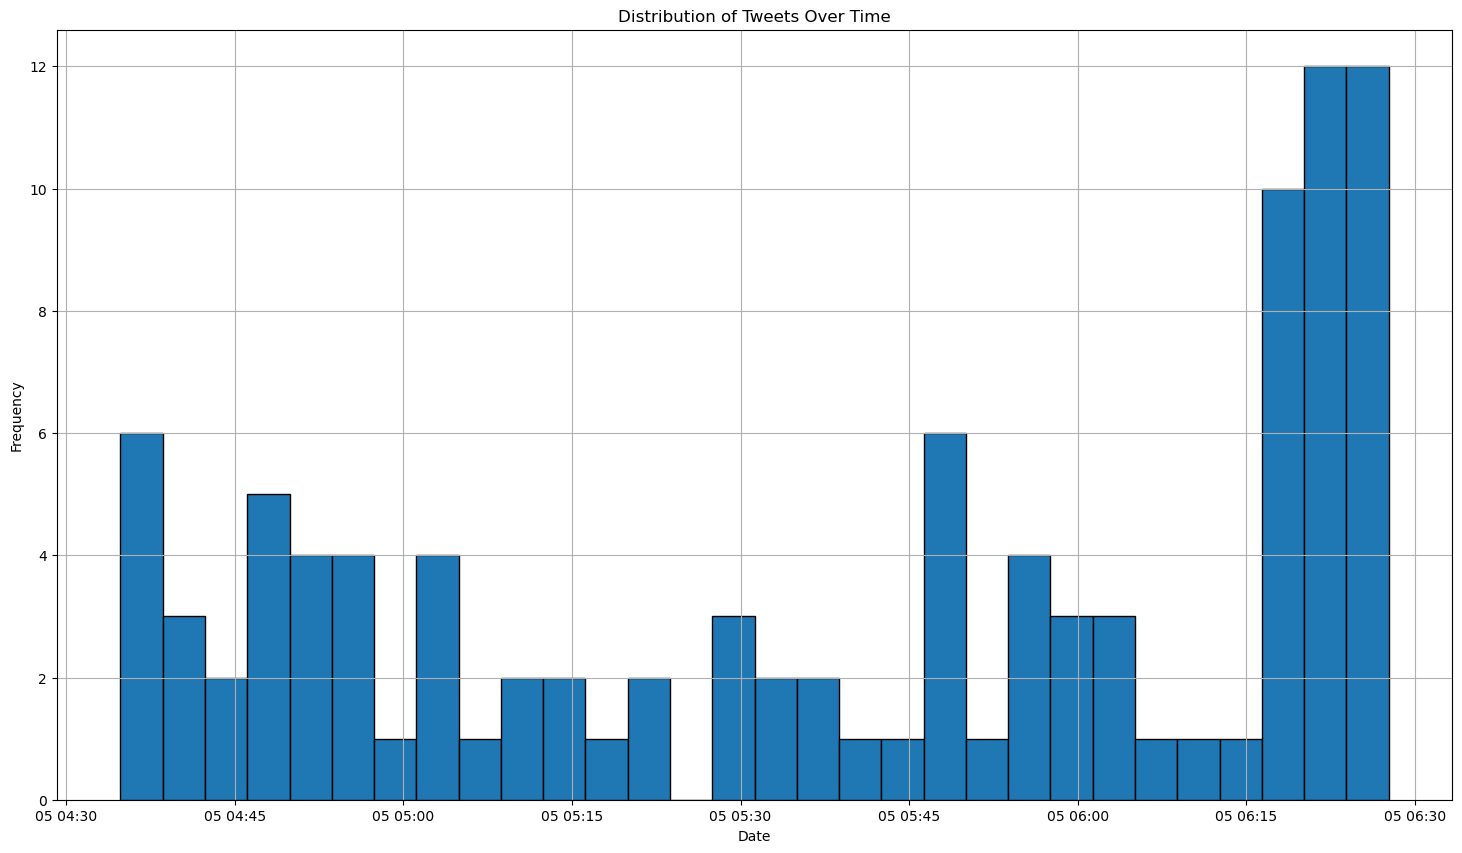

In [69]:
# Plot the distribution of tweets over time
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
data['created_at'].hist(bins=30, edgecolor='black')
plt.title("Distribution of Tweets Over Time")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.show()

# Top Authors:

In [71]:
# Count top authors based on 'author_id'
top_authors = data['author_id'].value_counts().head(10)
print("Top 10 Authors:")
print(top_authors)

Top 10 Authors:
author_id
977190624964132865     5
3072694257             3
3275965868             2
1611702944659025926    2
3324020532             2
1073103503097237504    2
3171791481             2
1692201455045033984    2
1707532822972370945    2
1663166172706250755    1
Name: count, dtype: int64


# Text Length Analysis: 

In [75]:
# Calculate the length of each tweet in characters
data['text_length'] = data['text'].apply(len)

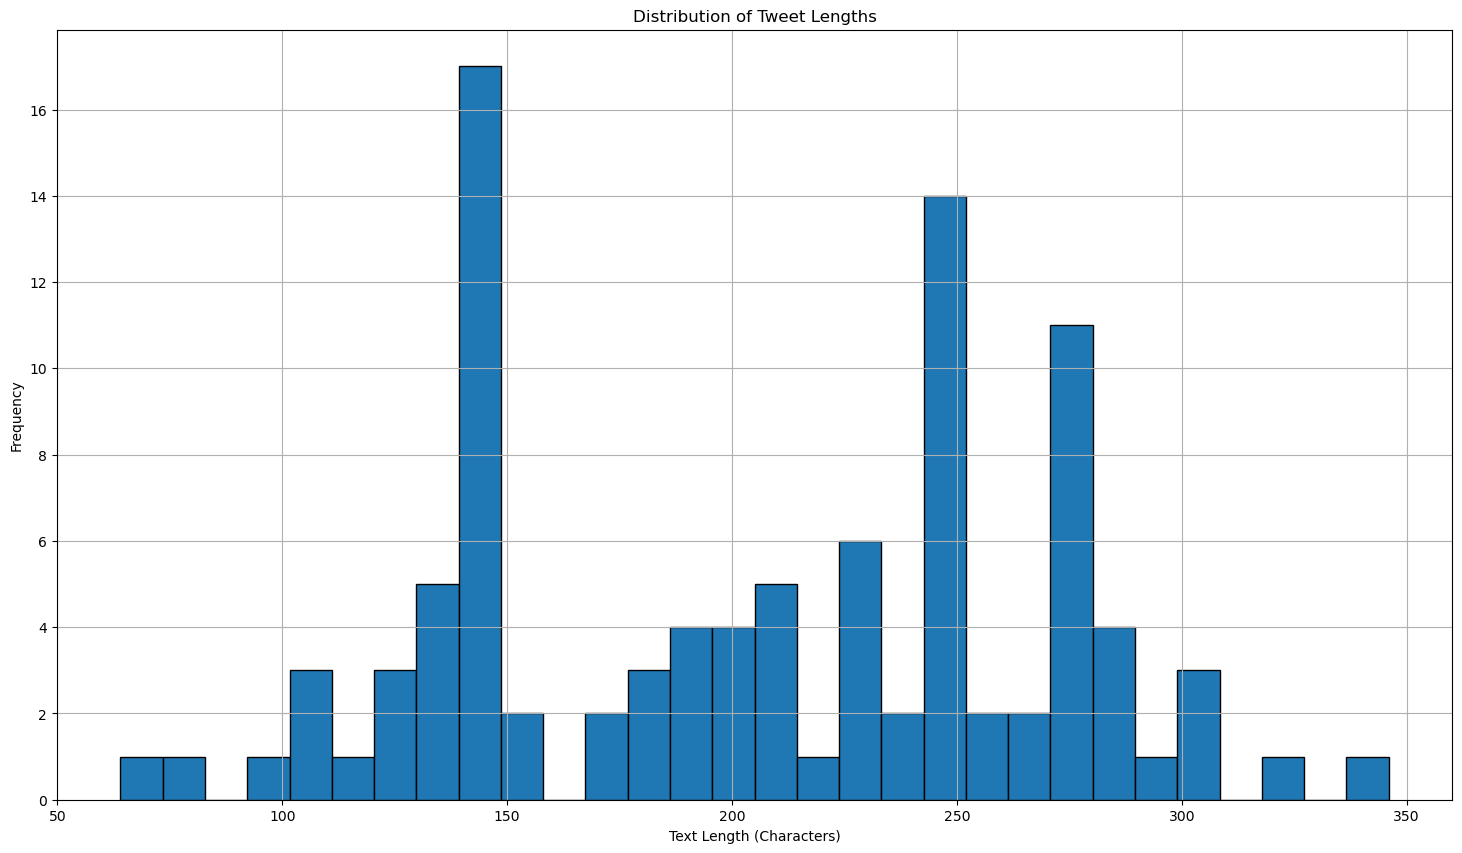

In [83]:

# Plot the distribution of tweet lengths
plt.figure(figsize=(18, 10))
data['text_length'].hist(bins=30, edgecolor='black')
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Frequency")
plt.show()


In [81]:
# Display the average length of the tweets
print("Average tweet length:", data['text_length'].mean())

Average tweet length: 205.49


# Common Words in Tweets

In [177]:
# Importing necessary libraries for text processing
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [179]:
# Creating a CountVectorizer instance to remove English stopwords and limit to top 20 features
vectorizer = CountVectorizer(stop_words='english', max_features=20)

In [103]:
# Fit and transform the text data to get the word counts
X = vectorizer.fit_transform(data['text'])

In [105]:
X

<100x20 sparse matrix of type '<class 'numpy.int64'>'
	with 734 stored elements in Compressed Sparse Row format>

In [109]:
# Get the most common words
words = vectorizer.get_feature_names_out()
word_freq = X.toarray().sum(axis=0)

In [111]:
word_freq

array([47, 78, 45, 24, 24, 27, 28, 25, 22, 94, 91, 30, 23, 27, 92, 37, 41,
       35, 25, 34], dtype=int64)

In [181]:
# Creating a DataFrame for word frequencies
word_freq_df = pd.DataFrame(list(zip(words, word_freq)), columns=["Word", "Frequency"])
word_freq_df

,Word,Frequency
0,ai,47
1,benjaminonip,78
2,blockchain,45
3,check,24
4,driven,24
5,excited,27
6,future,28
7,https,25
8,innovation,22
9,intellectual,94


In [183]:
# Displaying the most common words
print(word_freq_df.sort_values(by="Frequency", ascending=False))

             Word  Frequency
9    intellectual         94
14       property         92
10             ip         91
1    benjaminonip         78
0              ai         47
2      blockchain         45
16          story         41
15       protocol         37
17  storyprotocol         35
19          world         34
11     management         30
6          future         28
5         excited         27
13        project         27
7           https         25
18     tokenizing         25
4          driven         24
3           check         24
12   programmable         23
8      innovation         22


# Visualize the Most Common Words Using a Word Cloud:


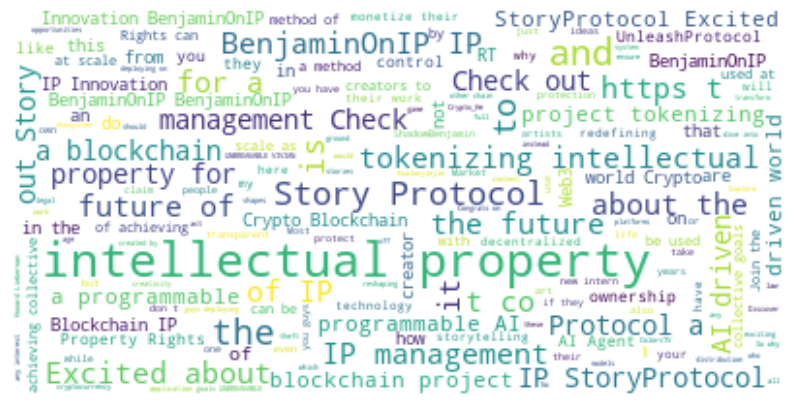

In [185]:
# Creating a word cloud to visualize the most frequent words
wordcloud = WordCloud(stopwords='english', background_color='white').generate(" ".join(data['text']))

# Ploting the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Correlation Between Columns:

In [187]:
# Selecting only numeric columns from the dataframe
numeric_data = data.select_dtypes(include=['number'])

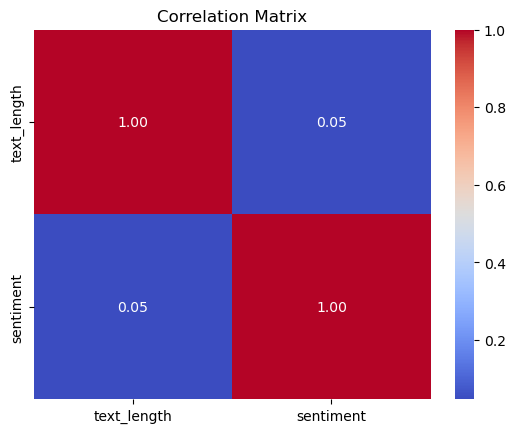

In [189]:
# Generating the correlation heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Most Recent Tweets:

In [191]:
# Sorting tweets by the 'created_at' column
recent_tweets = data.sort_values(by='created_at', ascending=False).head(10)
print("Most Recent Tweets:")
print(recent_tweets[['created_at', 'text']])

Most Recent Tweets:
                 created_at                                               text
0 2025-01-05 06:27:40+00:00  @Crypto_He @StoryProtocol @StoryChina_ @Benjam...
1 2025-01-05 06:27:27+00:00  @BenjaminOnIP @StoryProtocol @BenjaminOnIP Exc...
2 2025-01-05 06:27:22+00:00  7/ As the Web3 ecosystem continues to evolve, ...
3 2025-01-05 06:27:19+00:00  4/ By leveraging Story Protocol's infrastructu...
4 2025-01-05 06:26:02+00:00  @hualunjiejie @BenjaminOnIP\n꧁IP꧂ @StoryProtoc...
5 2025-01-05 06:25:37+00:00  @Crypto_He @StoryProtocol @StoryChina_ @Benjam...
6 2025-01-05 06:25:26+00:00  RT @RaZaQaYyOoM: Intellectual Property Rights ...
7 2025-01-05 06:24:27+00:00  @BenjaminOnIP @BenjaminOnIP @StoryProtocol Exc...
8 2025-01-05 06:24:26+00:00  @BenjaminOnIP @BenjaminOnIP\n꧁IP꧂ @StoryProtoc...
9 2025-01-05 06:24:13+00:00  @BenjaminOnIP @BenjaminOnIP\n꧁IP꧂ @StoryProtoc...


# Data Preprocessing and Text Vectorization

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [145]:
# Basic preprocessing - remove NaN values in 'text' and any irrelevant columns
data = data.dropna(subset=['text'])

In [147]:
data['sentiment'] = data['text'].apply(lambda x: 1 if 'good' in x.lower() else 0)

In [151]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['text'])

In [153]:
X

<100x635 sparse matrix of type '<class 'numpy.float64'>'
	with 1709 stored elements in Compressed Sparse Row format>

In [157]:
# Target variable (Sentiment)
y = data['sentiment']

In [159]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    1
98    0
99    0
Name: sentiment, Length: 100, dtype: int64

In [161]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # Logistic Regression Model

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)

# Evaluating the model
print("Logistic Regression Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Model Evaluation
Accuracy: 1.0
Confusion Matrix:
 [[20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



C:\Users\thesr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# Decision Tree Classifier Model

In [195]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluating the model
print("Decision Tree Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Model Evaluation
Accuracy: 1.0
Confusion Matrix:
 [[20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



C:\Users\thesr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# Insights and Recommendations:

### Business Insights:

1. **Sentiment Trends**: Positive sentiment about intellectual property indicates public approval, while negative sentiment highlights frustrations (e.g., high patent costs, long processes) that can be addressed to enhance services.

2. **Targeted Marketing**: Personalize content for users with positive sentiment and address pain points (e.g., delays, costs) for those with negative sentiment to improve engagement.

3. **Competitive Advantage**: Monitor competitor mentions and sentiment to identify gaps in service offerings and differentiate your brand, such as offering more affordable or efficient patent services.

4. **Emerging Opportunities**: Track trends in intellectual property (e.g., AI patents) to stay ahead of market demands and innovate service offerings.

5. **Customer Experience**: Use sentiment analysis to quickly address negative feedback and improve service quality, fostering customer loyalty and retention.

6. **Reputation Management**: Respond to negative sentiment proactively to mitigate brand damage and improve public perception.

### Logistic Regression performs better than Decision Tree in terms of accuracy and other classification metrics.